<a href="https://colab.research.google.com/github/tirth-jarsania/Deep-Learning/blob/main/scalarbackpropogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the required library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error , log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import imageio
from IPython.display import HTML

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

define our own colormap

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [ ]:
np.random.seed(0)

generate the data

In [ ]:
data , labels = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)
print(data.shape , labels.shape)

(1000, 2) (1000,)


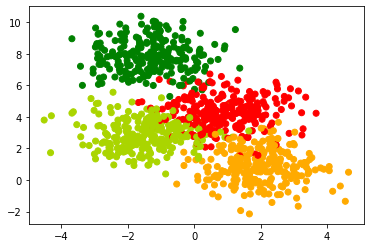

In [ ]:
plt.scatter(data[:,0] , data[:,1] , c=labels , cmap=my_cmap)
plt.show()

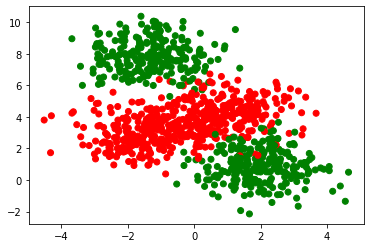

In [ ]:
labels_org = labels
labels = np.mod( labels , 2 )
plt.scatter(data[:,0] , data[:,1] , c=labels , cmap=my_cmap)
plt.show()

In [ ]:
X_train , X_val , Y_train , Y_val = train_test_split( data, labels, stratify =labels, random_state =0)  # split the data in the training and validation part
print( X_train.shape , X_val.shape)

(750, 2) (250, 2)


In [ ]:
class FirstFFNetwork:

  def __init__(self):
    self.w1 = np.random.randn();
    self.w2 = np.random.randn();
    self.w3 = np.random.randn();
    self.w4 = np.random.randn();
    self.w5 = np.random.randn();
    self.w6 = np.random.randn();
    self.b1 = 0;
    self.b2 = 0;
    self.b3 = 0;

  def sigmoid(self , x):
    return 1.0 / (1.0 + np.exp(-x));

  def forward_pass(self, x):
    self.x1 , self.x2 = x
    self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
    self.h1 = self.sigmoid( self.a1 )
    self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
    self.h2 = self.sigmoid( self.a2 )
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
    self.h3 = self.sigmoid( self.a3 )
    return self.h3

  def grad(self , x, y ):
    self.forward_pass(x)

    self.dw5 = (self.h3-y) * self.h3 * (1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3 * (1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3 * (1-self.h3)

    self.dw1 = (self.h3-y) * self.h3 * (1-self.h3) * self.w5 * self.h1 * (1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3 * (1-self.h3) * self.w5 * self.h1 * (1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3 * (1-self.h3) * self.w5 * self.h1 * (1-self.h1) 

    self.dw3 = (self.h3-y) * self.h3 * (1-self.h3) * self.w6 * self.h2 * (1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3 * (1-self.h3) * self.w6 * self.h2 * (1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3 * (1-self.h3) * self.w6 * self.h2 * (1-self.h2) 

  def fit( self , X, Y, epochs = 1, learning_rate = 1, initialise = True , display_loss = False , display_weight = False ):

    if initialise :
      self.w1 = np.random.randn();
      self.w2 = np.random.randn();
      self.w3 = np.random.randn();
      self.w4 = np.random.randn();
      self.w5 = np.random.randn();
      self.w6 = np.random.randn();
      self.b1 = 0;
      self.b2 = 0;
      self.b3 = 0;

    if display_loss:
      loss = np.ones( epochs )

    for i in tqdm_notebook(range(epochs) , total = epochs , unit = "epoch" ):
      dw1,dw2,dw3,dw4,dw5,dw6 = [0]*6
      db1,db2,db3 = [0]*3

      for x,y in zip(X,Y) :
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3

      m = X.shape[1]
      
      dw1 /= m
      dw2 /= m
      dw3 /= m
      dw4 /= m
      dw5 /= m
      dw6 /= m
      db1 /= m
      db2 /= m
      db3 /= m

      self.w1 = self.w1 - dw1 * learning_rate
      self.w2 = self.w2 - dw2 * learning_rate
      self.w3 = self.w3 - dw3 * learning_rate
      self.w4 = self.w4 - dw4 * learning_rate
      self.w5 = self.w5 - dw5 * learning_rate
      self.w6 = self.w6 - dw6 * learning_rate
      self.b1 = self.b1 - db1 * learning_rate
      self.b2 = self.b2 - db2 * learning_rate
      self.b3 = self.b3 - db3 * learning_rate

      if display_loss:
        Y_pred = self.predict(X) 
        loss[i] = mean_squared_error(Y,Y_pred)

      if display_weight:
        weight_matrix = np.array([[0,self.b3,self.w5,self.w6,0,0],[self.b1,self.w1,self.w2,self.b2,self.w3,self.w4]])
        weight_matrices.append( weight_matrix )
        
    if display_loss:
      plt.plot(loss)
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error")
      plt.show()


  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append( y_pred )
    return np.array(Y_pred)

  def predict_h1(self,X,binary=True):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append( self.h1 )
    return np.array(Y_pred)

  def predict_h2(self,X,binary=True):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append( self.h2 )
    return np.array(Y_pred)

  def predict_h3(self,X,binary=True):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append( self.h3 )
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


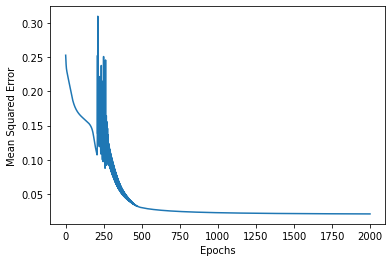

In [ ]:
weight_matrices = []
ffn = FirstFFNetwork()
ffn.fit( X_train , Y_train , epochs = 2000 ,learning_rate = 0.01, display_loss = True , display_weight=True)

In [ ]:
Y_pred_train = ffn.predict( X_train )
Y_pred_binarized_train = (Y_pred_train >= 0.5 ).astype( "int" ).ravel()
Y_pred_val = ffn.predict( X_val )
Y_pred_binarized_val = (Y_pred_val >= 0.5 ).astype( "int" ).ravel()
accuracy_train = accuracy_score( Y_pred_binarized_train , Y_train )
accuracy_val = accuracy_score( Y_pred_binarized_val , Y_val )

In [ ]:
print("Training_Accuracy", round(accuracy_train,2))
print("Validation_Accuracy", round(accuracy_val,2))

Training_Accuracy 0.98
Validation_Accuracy 0.94


make some own function for better visulization

True

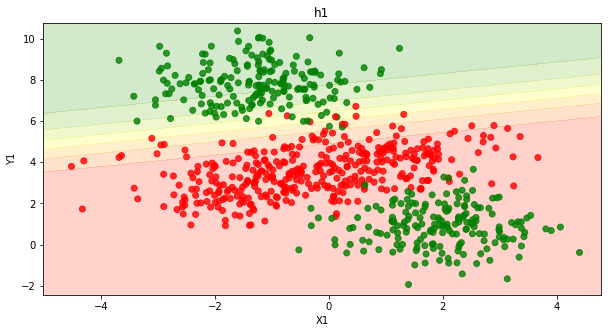

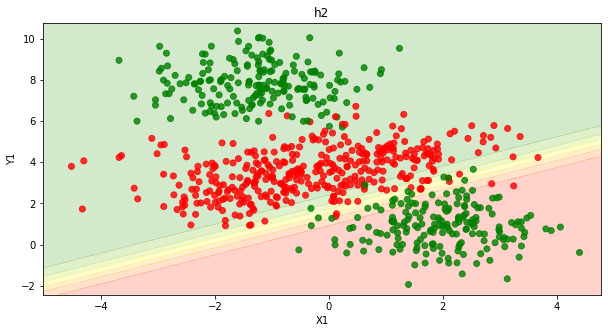

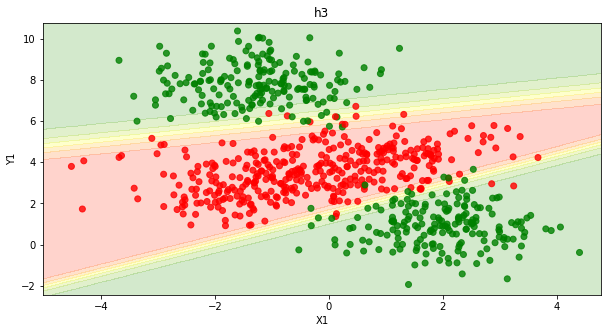

In [ ]:
def make_meshgrid(x,y,h=0.2):
  x_min , x_max = x.min() - 0.5 , x.max() + 0.5
  y_min , y_max = y.min() - 0.5 , y.max() + 0.5
  xx, yy = np.meshgrid(np.arange(x_min , x_max , h) , np.arange(y_min , y_max , h))
  return xx,yy

def plot_contours(ax, predict , xx, yy, **params):
  Z = predict( np.c_[xx.ravel() , yy.ravel() ])
  Z = Z.reshape( xx.shape )
  return ax.contourf( xx, yy, Z, **params )

def plot_boundary():
  xx , yy = make_meshgrid( X_train[:,0] , X_train[:,1])
  predict_functions = [ ffn.predict_h1 , ffn.predict_h2 , ffn.predict_h3 ]

  for i in range(3):
    fig , ax = plt.subplots(figsize=(10,5))

    plot_contours( ax , predict_functions[i] , xx , yy , cmap = my_cmap , alpha = 0.2 )
    ax.scatter( X_train[:,0] , X_train[:,1] , c=Y_train , cmap = my_cmap , alpha = 0.8)
    ax.set_xlim( xx.min() , xx.max() )
    ax.set_ylim( yy.min() , yy.max() )
    ax.set_xlabel( 'X1' )
    ax.set_ylabel( 'Y1' )
    ax.set_title( "h" + str(i+1) )

  return True

plot_boundary()

In [ ]:
def plot_heat_map(epoch):
  fig = plt.figure(figsize=(10,1))
  sns.heatmap(weight_matrices[epoch] , vmin=-3,vmax=3,cmap=my_cmap,annot=True)
  plt.title("Epoch " + str(epoch) )

  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb() , dtype='uint8')
  return image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [ ]:
print(len(weight_matrices))

2000


Visualize changing the value of (weight & bias) term in every 100 epochs 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


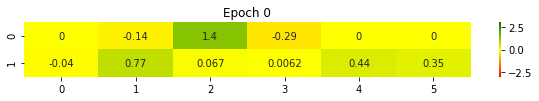

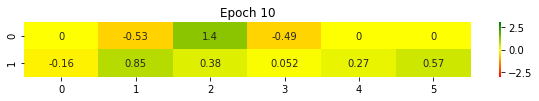

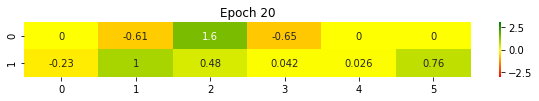

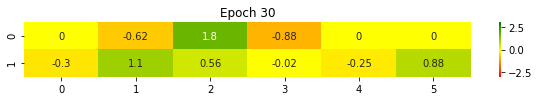

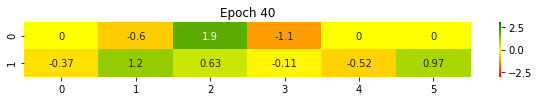

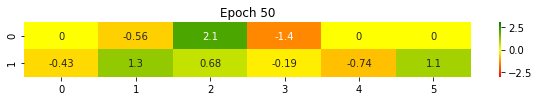

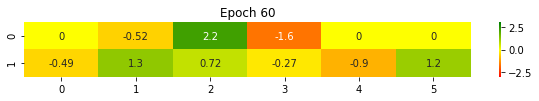

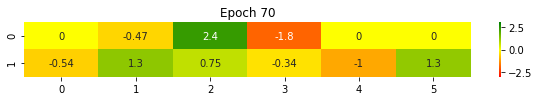

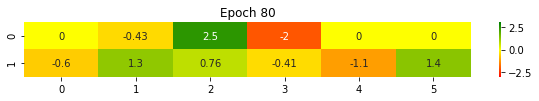

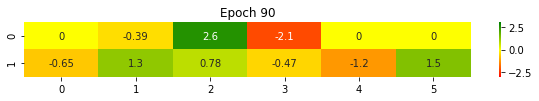

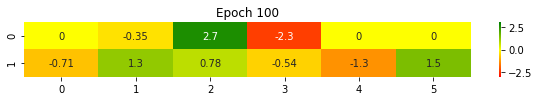

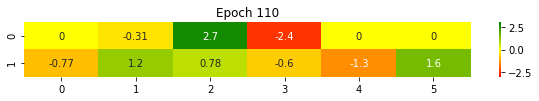

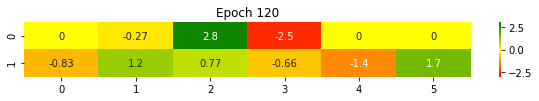

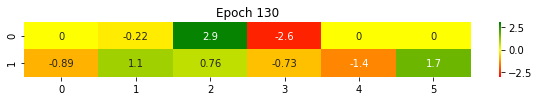

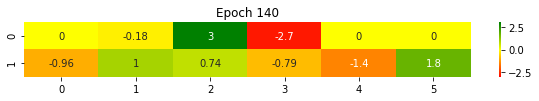

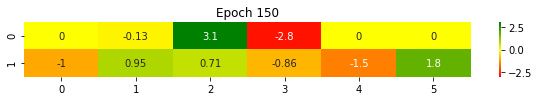

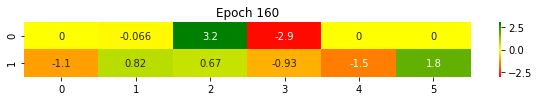

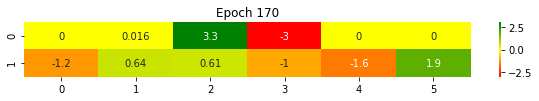

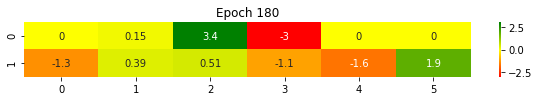

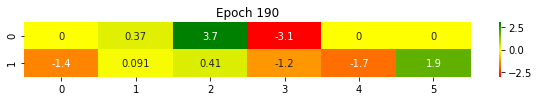

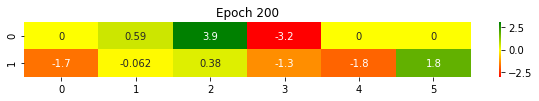

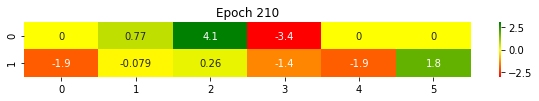

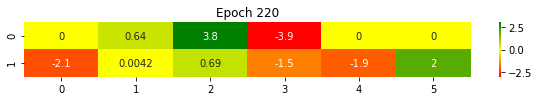

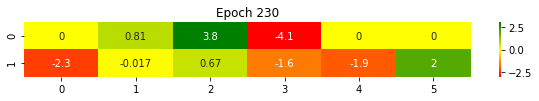

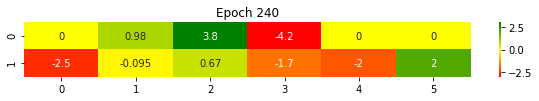

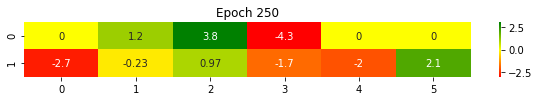

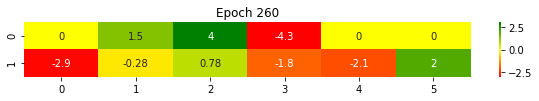

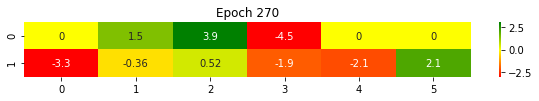

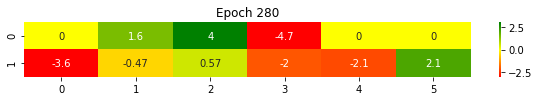

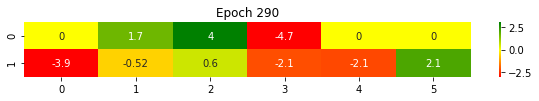

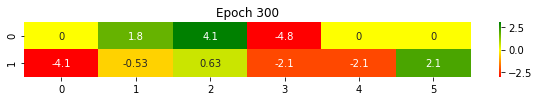

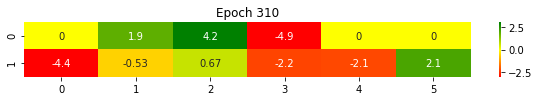

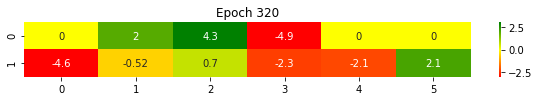

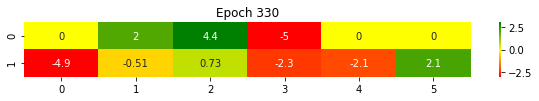

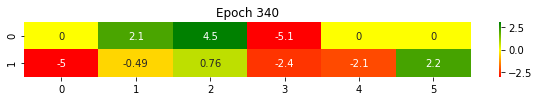

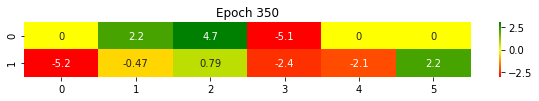

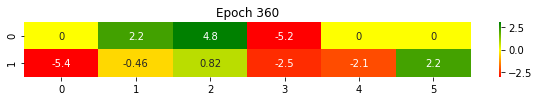

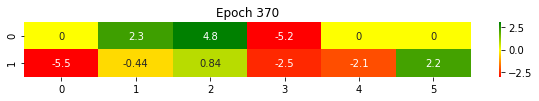

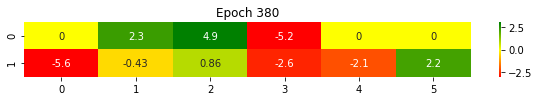

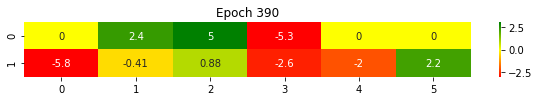

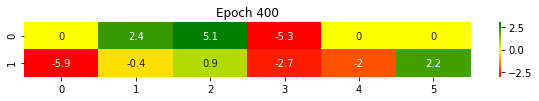

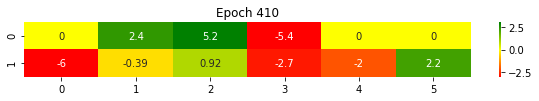

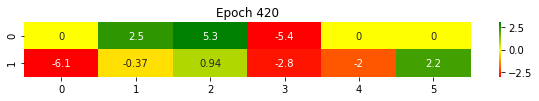

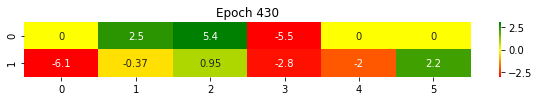

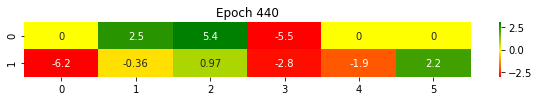

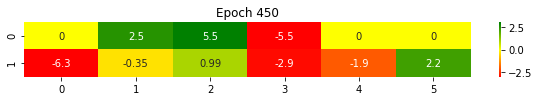

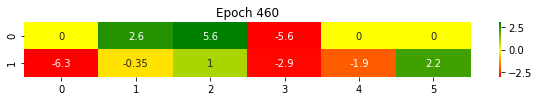

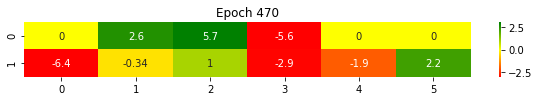

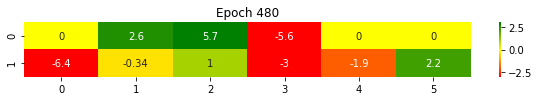

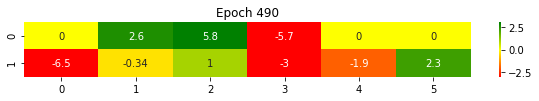

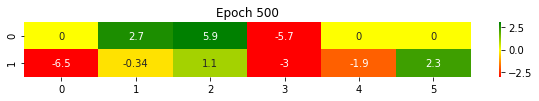

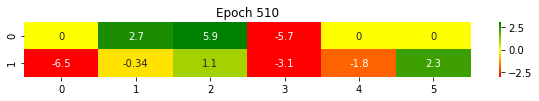

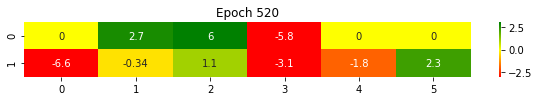

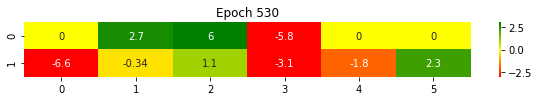

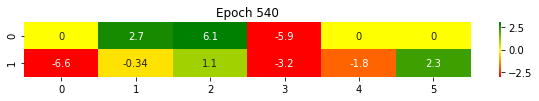

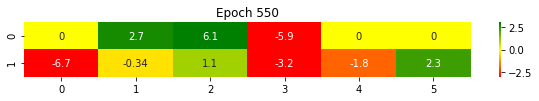

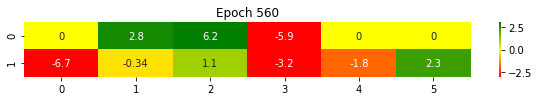

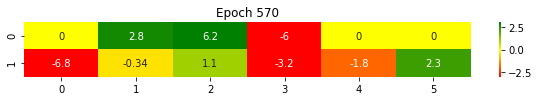

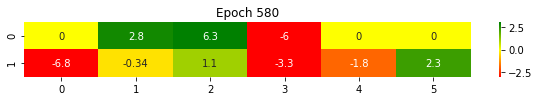

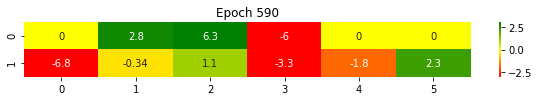

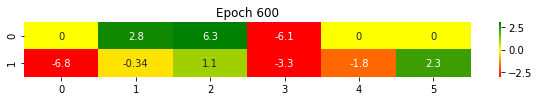

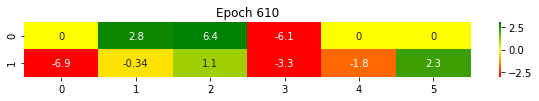

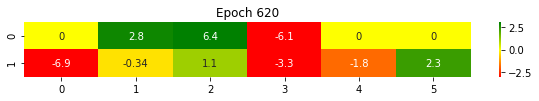

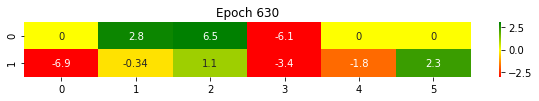

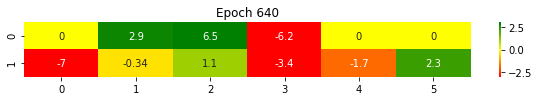

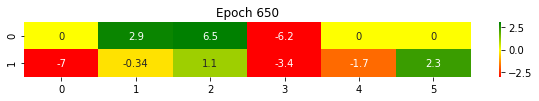

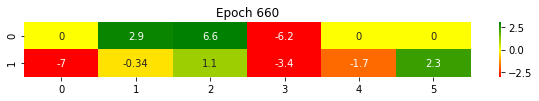

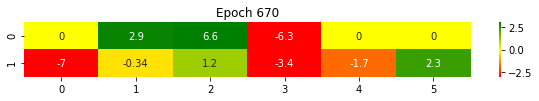

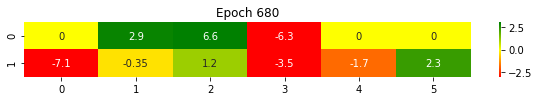

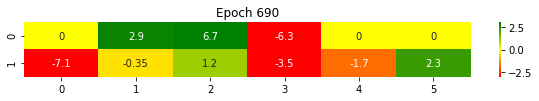

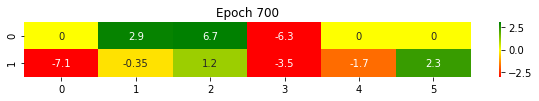

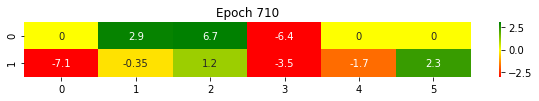

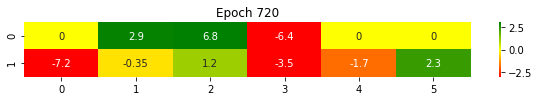

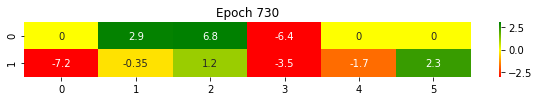

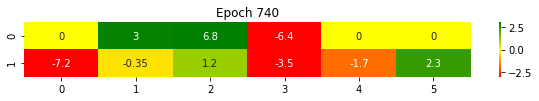

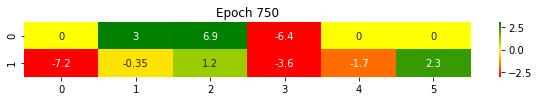

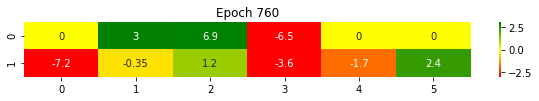

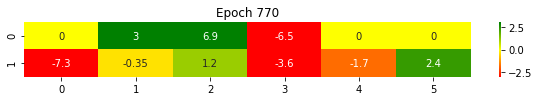

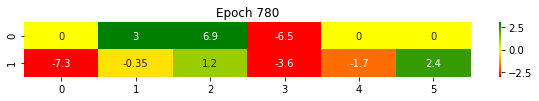

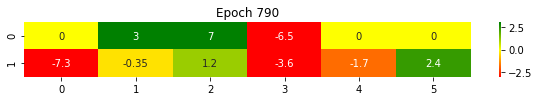

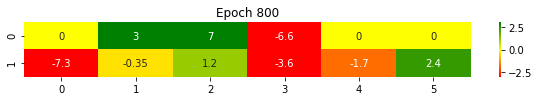

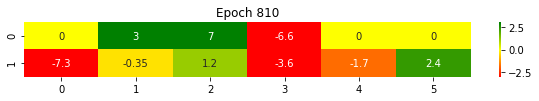

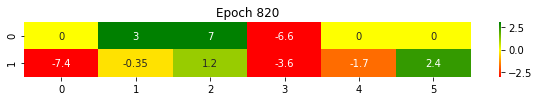

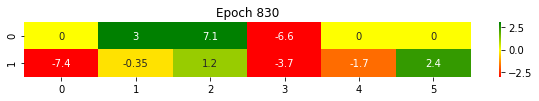

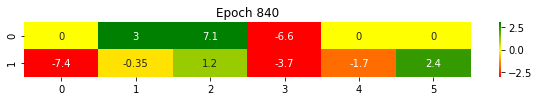

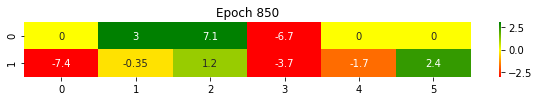

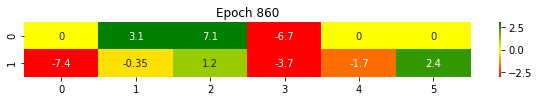

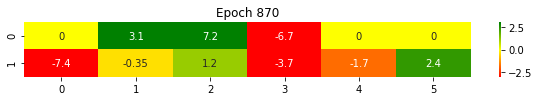

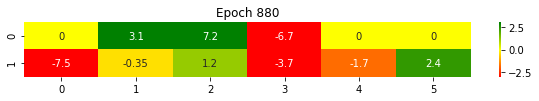

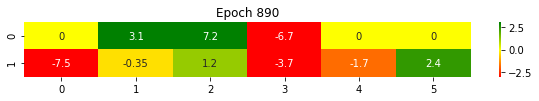

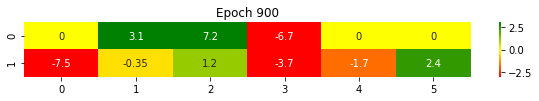

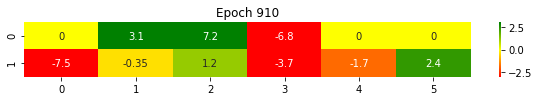

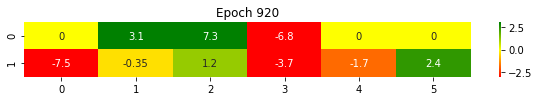

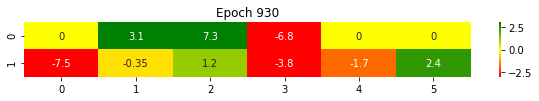

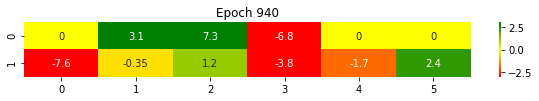

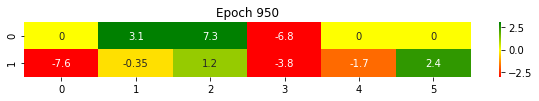

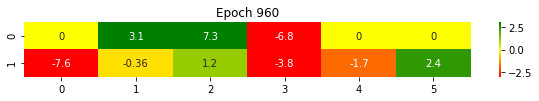

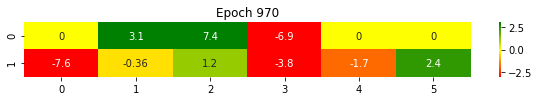

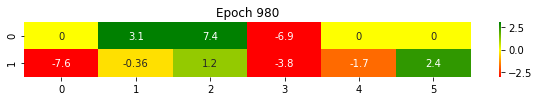

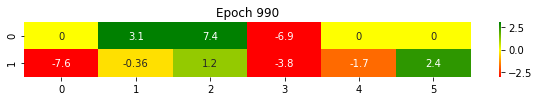

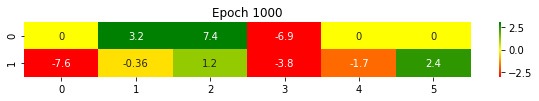

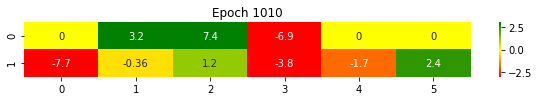

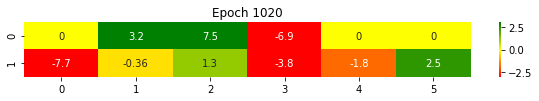

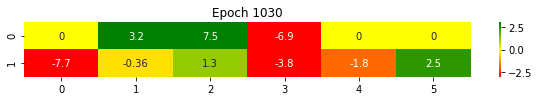

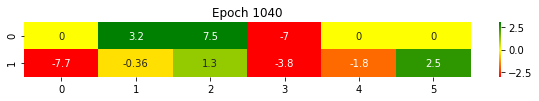

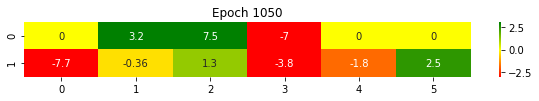

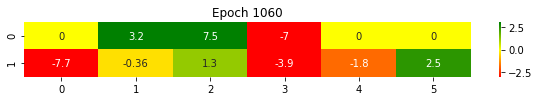

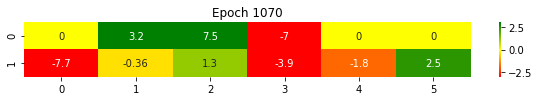

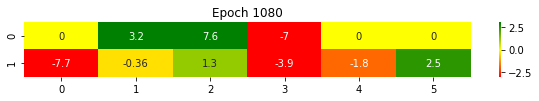

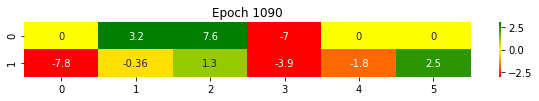

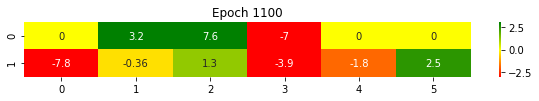

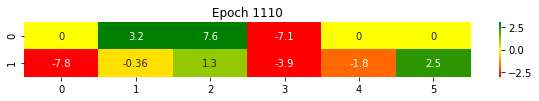

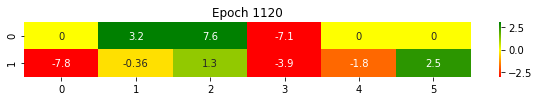

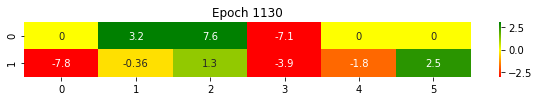

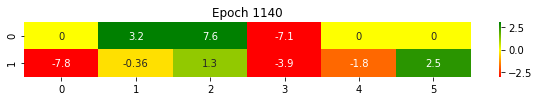

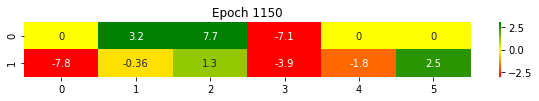

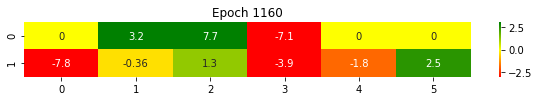

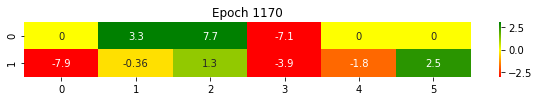

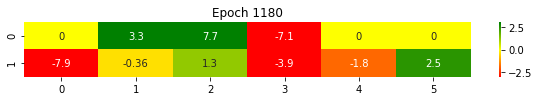

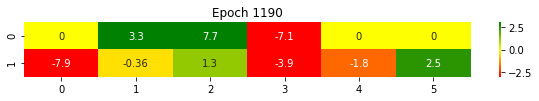

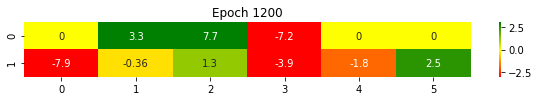

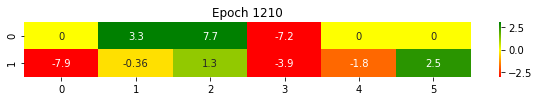

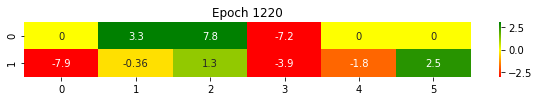

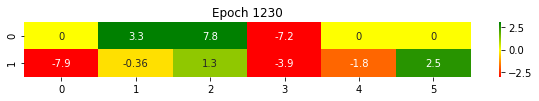

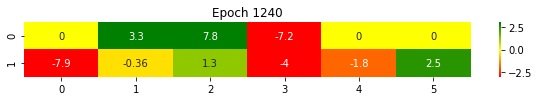

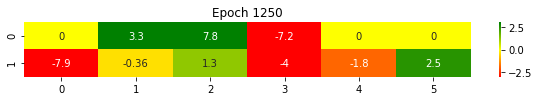

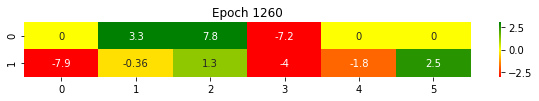

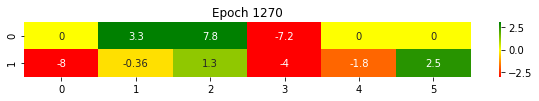

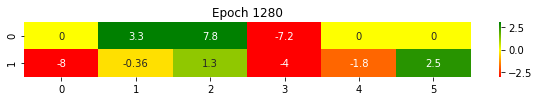

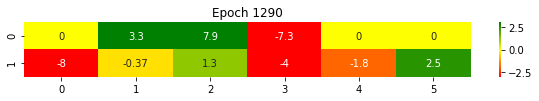

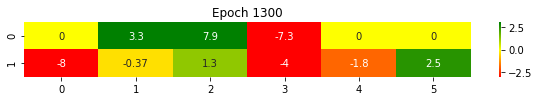

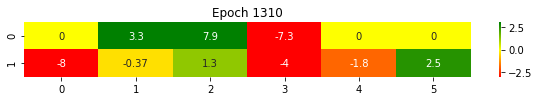

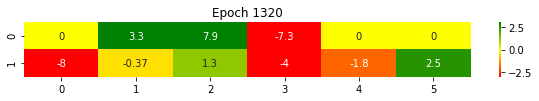

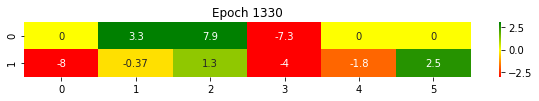

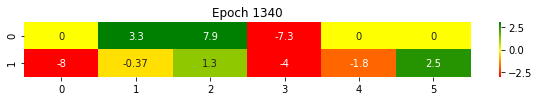

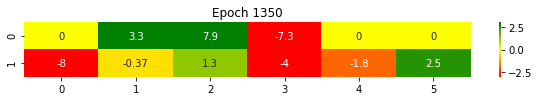

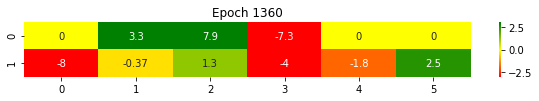

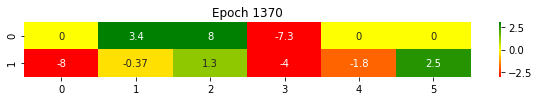

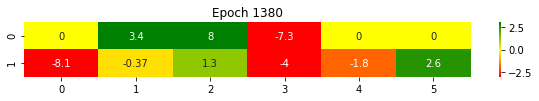

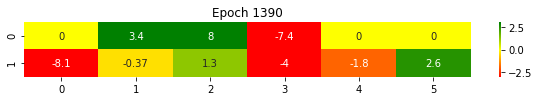

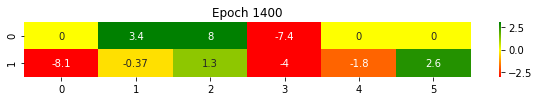

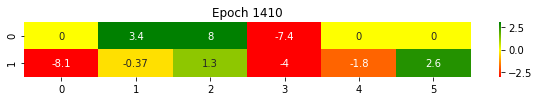

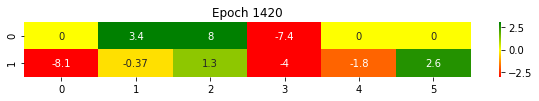

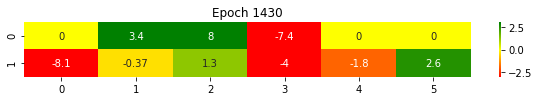

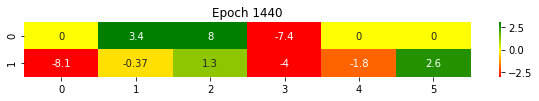

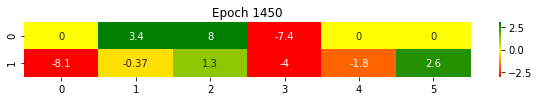

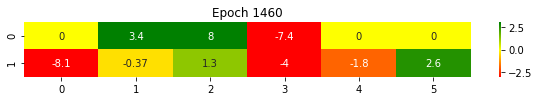

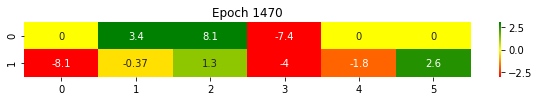

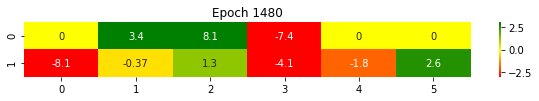

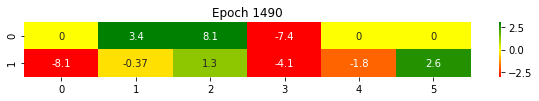

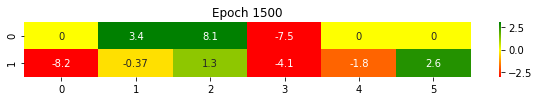

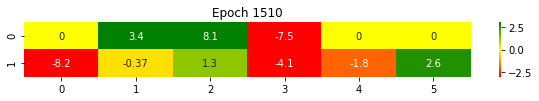

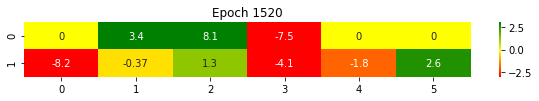

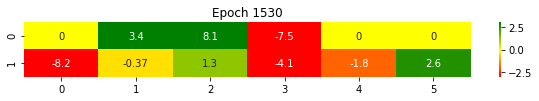

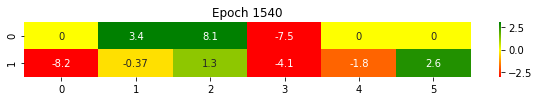

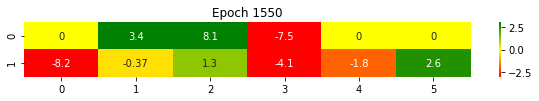

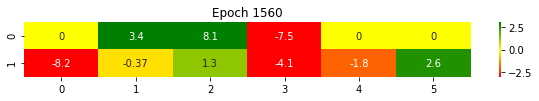

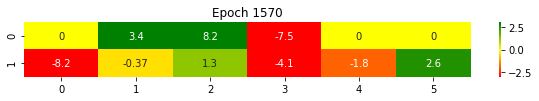

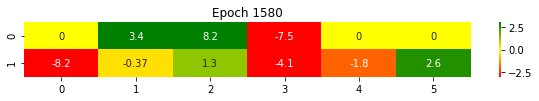

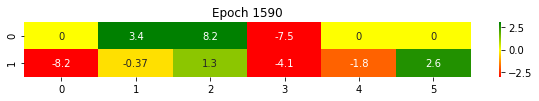

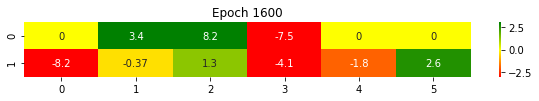

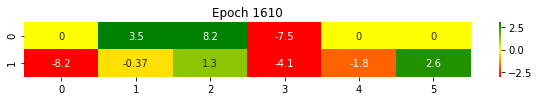

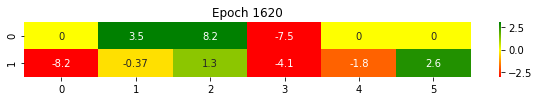

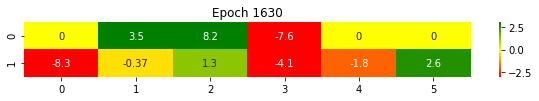

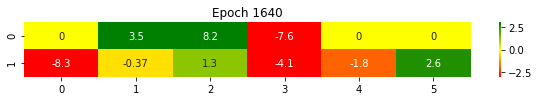

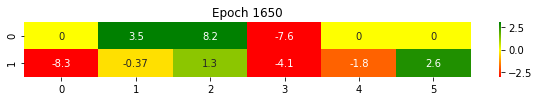

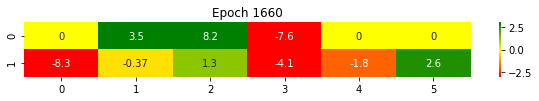

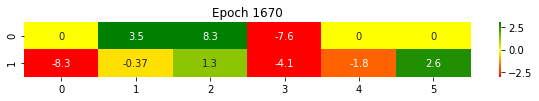

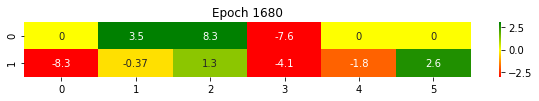

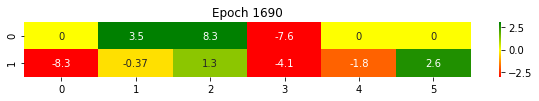

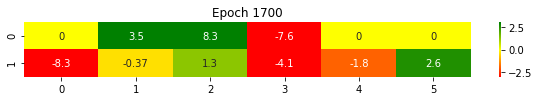

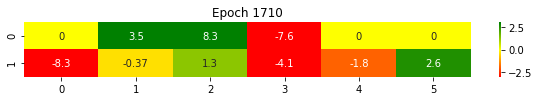

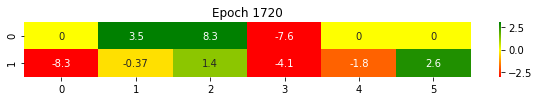

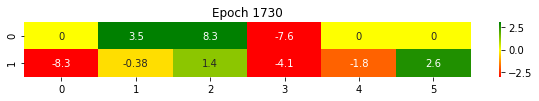

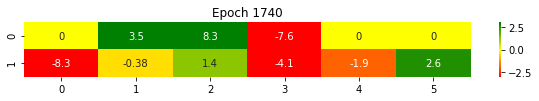

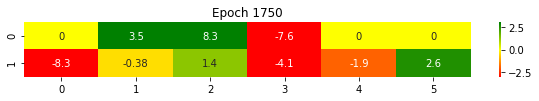

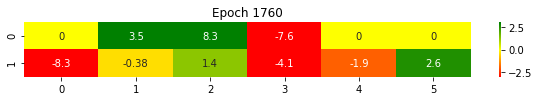

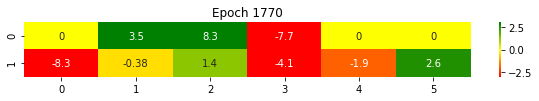

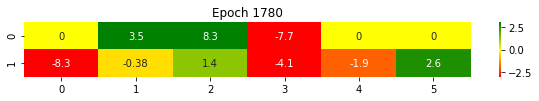

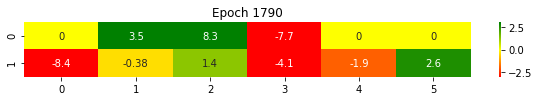

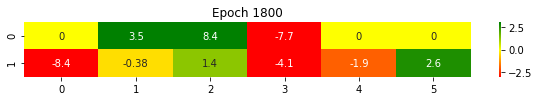

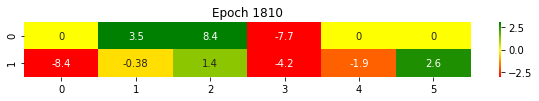

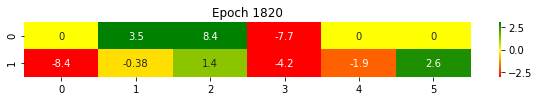

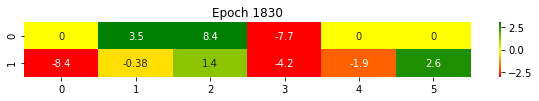

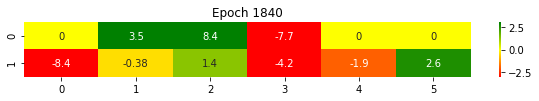

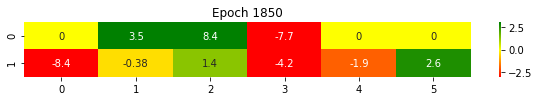

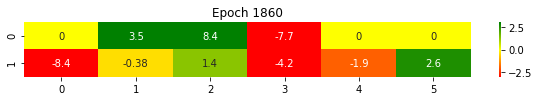

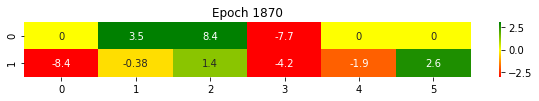

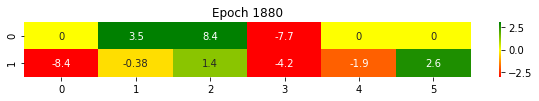

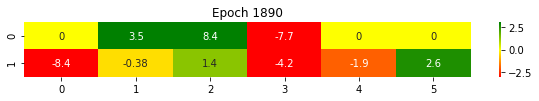

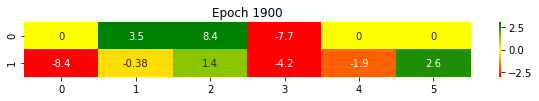

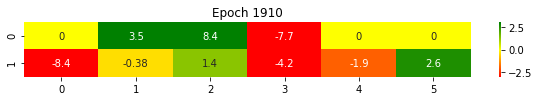

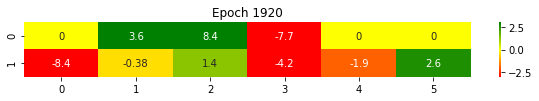

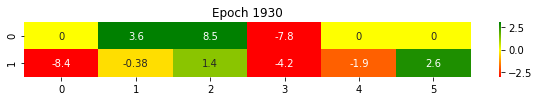

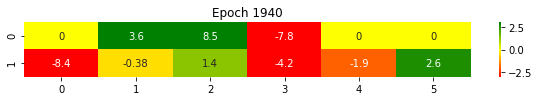

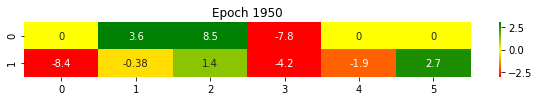

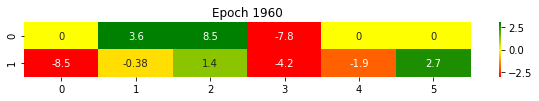

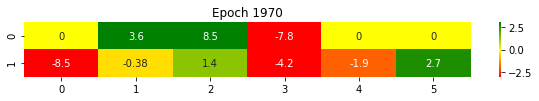

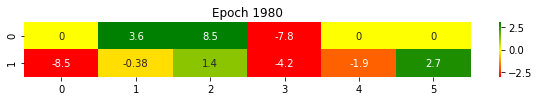

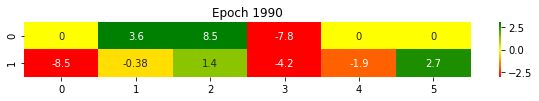

In [ ]:
imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range( 0 , len( weight_matrices) , len(weight_matrices)//200)] , fps=1 )

In [ ]:
x = np.zeros((2,4))
print(x.shape)
x = x.reshape(1,-1)
print(x.shape)

(2, 4)
(1, 8)
